In [1]:
import pickle
import os
from collections import OrderedDict
from matplotlib.transforms import blended_transform_factory
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

root_dir = '/DATA5_DB8/data/xchen/GCGRU-master/plot_data'
def pickle_with_name(pickle_name):
    pickle_file = open(os.path.join(root_dir,pickle_name),'rb')
    variable = pickle.load(pickle_file)
    pickle_file.close()
    return variable 

# case I 运行时间对比分析

gru4rec_gcnae: P-GraphAE

GC_gru4rec: CAASR

gru4rec_mf: P-Cofactor

Gru4rec = GRU4rec

In [2]:
gru4rec_time = [np.mean(pickle_with_name('gru4rec_train_time_list_amazon-phone.pkl')),
                            np.mean(pickle_with_name('gru4rec_train_time_list_amazon-video.pkl')),
                            np.mean(pickle_with_name('gru4rec_train_time_list_taobao.pkl'))]
gru4rec_time = gru4rec_time[:2]
gru4rec_time

[0.9930026054382324, 2.261900043487549]

In [3]:
gru4rec_mf_time = [np.mean(pickle_with_name('gru4rec_mf_train_time_list_amazon-phone.pkl')),
                            np.mean(pickle_with_name('gru4rec_mf_train_time_list_amazon-video.pkl')),
                            np.mean(pickle_with_name('gru4rec_mf_train_time_list_taobao.pkl'))]
gru4rec_mf_time = gru4rec_mf_time[:2]
gru4rec_mf_time

[1.606128191947937, 3.331057238578796]

In [4]:
GC_gru4rec_time = [np.mean(pickle_with_name('GC_gru4rec_train_time_list_amazon-phone.pkl')),
                            np.mean(pickle_with_name('GC_gru4rec_train_time_list_amazon-video.pkl')),
                            np.mean(pickle_with_name('GC_gru4rec_train_time_list_taobao.pkl'))]
GC_gru4rec_time = GC_gru4rec_time[:2]
GC_gru4rec_time

[4.7449071963628136, 8.479530572891235]

In [5]:
gru4rec_gcnae_time = [np.mean(pickle_with_name('gru4rec_gcnae_train_time_list_amazon-phone.pkl')),
                            np.mean(pickle_with_name('gru4rec_gcnae_train_time_list_amazon-video.pkl')),
                            np.mean(pickle_with_name('gru4rec_gcnae_train_time_list_taobao.pkl'))]


gru4rec_gcnae_time = gru4rec_gcnae_time[:2]
gru4rec_gcnae_time

[4.733479038874308, 7.85246008237203]

gru4rec_gcnae: P-GraphAE

GC_gru4rec: CAASR

gru4rec_mf: P-Cofactor

gru4rec : GRU4rec

In [6]:
font = {'family': 'Times New Roman',
            'color': 'black',
            'weight': 'bold',
            'size': 15,
            }
fontsize = 15
legend_size = 15
width = 0.15  # the width of the bars

/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


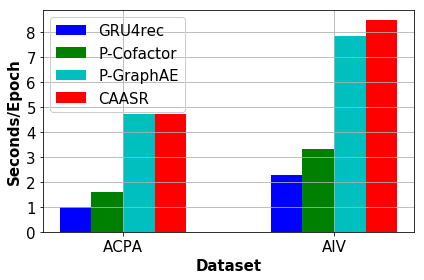

In [7]:
import numpy as np
import matplotlib.pyplot as plt

ind = np.arange(len(gru4rec_time))  # the x locations for the groups


fig, ax = plt.subplots()
gru4rec = ax.bar(ind - width/2*3, gru4rec_time, width,
                color='blue', label='GRU4rec')

gru4rec_mf = ax.bar(ind - width/2, gru4rec_mf_time, width,
                color='g', label='P-Cofactor')

gru4rec_gcnae = ax.bar(ind + width/2, gru4rec_gcnae_time, width,
                color='c', label='P-GraphAE')

GC_gru4rec = ax.bar(ind + width/2*3, GC_gru4rec_time, width,
                color='r', label='CAASR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Seconds/Epoch',fontdict=font)
ax.set_xlabel('Dataset',fontdict=font)
# ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('ACPA', 'AIV','TaoBao'))

legend = ax.legend(fontsize=legend_size,loc='best')
frame = legend.get_frame()
frame.set_alpha(1)
frame.set_facecolor('none')
ax.grid()
plt.tight_layout()
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.tight_layout()

plt.savefig('train_time_comparision.png')
# mrr_20_taobao

# case II 不同模型的指标随着epoch的变化趋势

In [8]:
gru4rec = {'MRR@20':[pickle_with_name('gru4rec_test_mrr_list_amazon-phone.pkl'),
                  pickle_with_name('gru4rec_test_mrr_list_amazon-video.pkl'),
                  pickle_with_name('gru4rec_test_mrr_list_taobao.pkl')],
          'Recall@20':[pickle_with_name('gru4rec_test_recall_list_amazon-phone.pkl'),
                  pickle_with_name('gru4rec_test_recall_list_amazon-video.pkl'),
                  pickle_with_name('gru4rec_test_recall_list_taobao.pkl')],
          'Train Loss': [pickle_with_name('gru4rec_train_bpr_loss_list_amazon-phone.pkl'),
                  pickle_with_name('gru4rec_train_bpr_loss_list_amazon-video.pkl'),
                  pickle_with_name('gru4rec_train_bpr_loss_list_taobao.pkl')]}

In [9]:
GC_gru4rec = {'MRR@20':[pickle_with_name('GC_gru4rec_test_mrr_list_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_test_mrr_list_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_test_mrr_list_taobao.pkl')],
          'Recall@20':[pickle_with_name('GC_gru4rec_test_recall_list_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_test_recall_list_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_test_recall_list_taobao.pkl')],
          'Train Loss': [pickle_with_name('GC_gru4rec_train_bpr_loss_list_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_train_bpr_loss_list_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_train_bpr_loss_list_taobao.pkl')]}


In [10]:
gru4rec_mf = {'MRR@20':[pickle_with_name('gru4rec_mf_test_mrr_list_amazon-phone.pkl'),
                  pickle_with_name('gru4rec_mf_test_mrr_list_amazon-video.pkl'),
                  pickle_with_name('gru4rec_mf_test_mrr_list_taobao.pkl')],
          'Recall@20':[pickle_with_name('gru4rec_mf_test_recall_list_amazon-phone.pkl'),
                  pickle_with_name('gru4rec_mf_test_recall_list_amazon-video.pkl'),
                  pickle_with_name('gru4rec_mf_test_recall_list_taobao.pkl')],
          'Train Loss': [pickle_with_name('gru4rec_mf_train_bpr_loss_list_amazon-phone.pkl'),
                  pickle_with_name('gru4rec_mf_train_bpr_loss_list_amazon-video.pkl'),
                  pickle_with_name('gru4rec_mf_train_bpr_loss_list_taobao.pkl')]}


In [11]:
gru4rec_gcnae = {'MRR@20':[pickle_with_name('gru4rec_gcnae_test_mrr_list_amazon-phone.pkl'),
                  pickle_with_name('gru4rec_gcnae_test_mrr_list_amazon-video.pkl'),
                  pickle_with_name('gru4rec_gcnae_test_mrr_list_taobao.pkl')],
          'Recall@20':[pickle_with_name('gru4rec_gcnae_test_recall_list_amazon-phone.pkl'),
                  pickle_with_name('gru4rec_gcnae_test_recall_list_amazon-video.pkl'),
                  pickle_with_name('gru4rec_gcnae_test_recall_list_taobao.pkl')],
          'Train Loss': [pickle_with_name('gru4rec_gcnae_train_bpr_loss_list_amazon-phone.pkl'),
                  pickle_with_name('gru4rec_gcnae_train_bpr_loss_list_amazon-video.pkl'),
                  pickle_with_name('gru4rec_gcnae_train_bpr_loss_list_taobao.pkl')]}


In [12]:
log_dict = {
'GRU4rec':gru4rec,
'P-Cofactor':gru4rec_mf,
'P-GraphAE':gru4rec_gcnae,
'CAASR':GC_gru4rec,}

In [13]:
def plot_target_with_epoch(log_dict,key1,key2,subsample=None,linewidth=2,markersize=8,linestyle = linestyles['solid'],y_interval=None,x_interval=None,file_addtional_str='',image_cate='.eps'):
    fig, ax = plt.subplots()
    model_list = list(log_dict.keys())

    color_list = ['blue','c','mediumslateblue','m','r']
    marker_list = ['s','>','<','D','8']
    for model_name,marker,color in zip(model_list,marker_list,color_list):
        data = log_dict[model_name][key1][key2]
        if data !=[]:
            if subsample:
                idx = range(0,len(data),subsample)
                if key1 != 'Train Loss':
                    data = [0] + data
                x = np.array(range(len(data)))[idx]
                y = np.array(data)[idx]
                plt.plot(x, y, color = color, marker=marker,label = model_name,linestyle=linestyle,markersize = markersize, linewidth=linewidth)  
            else:
                plt.plot(list(range(len(data))), data, linewidth=3, label = model_name)  
    
    
    ax.set_ylabel(key1,fontdict=font)
    ax.set_xlabel('Epoch',fontdict=font)
    
    
    legend = ax.legend(loc='best',fontsize=15)
    frame = legend.get_frame()
    frame.set_alpha(1)
    frame.set_facecolor('none')
    ax.grid()
    plt.tight_layout()
    plt.yticks(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    if y_interval != None and x_interval != None:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(y_interval))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(x_interval))
    plt.tight_layout()
    data_name = ('ACPA', 'AIV','TaoBao')
    file_name = '{}_{}'.format(key1,data_name[key2])
    plt.savefig('{}{}{}'.format(file_addtional_str,file_name,image_cate))
    print(file_name)

/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


MRR@20_ACPA
Recall@20_ACPA
Train Loss_ACPA


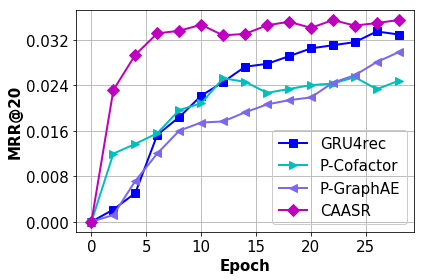

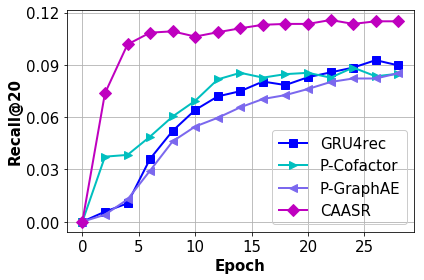

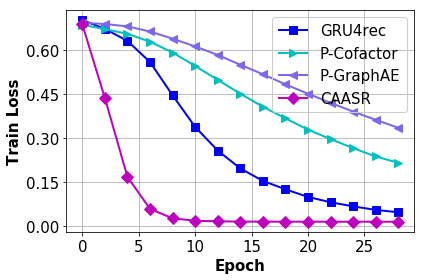

In [14]:
# draw ACPA
plot_target_with_epoch(log_dict,'MRR@20',0,subsample=2,linewidth=2,markersize=8,linestyle = linestyles['solid'],y_interval=0.008,x_interval=5)
plot_target_with_epoch(log_dict,'Recall@20',0,subsample=2,linewidth=2,markersize=8,linestyle = linestyles['solid'],y_interval=0.03,x_interval=5)
plot_target_with_epoch(log_dict,'Train Loss',0,subsample=2,linewidth=2,markersize=8,linestyle = linestyles['solid'],y_interval=0.15,x_interval=5)

/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


MRR@20_AIV
Recall@20_AIV
Train Loss_AIV


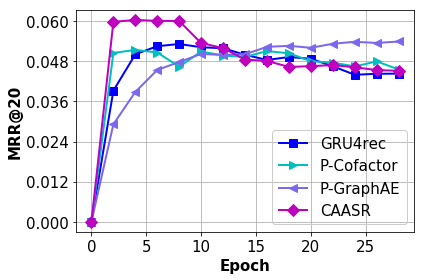

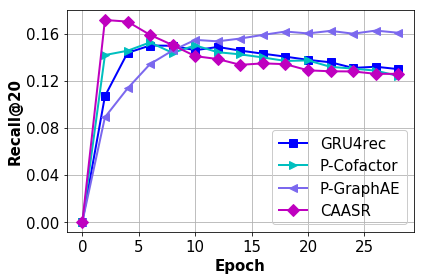

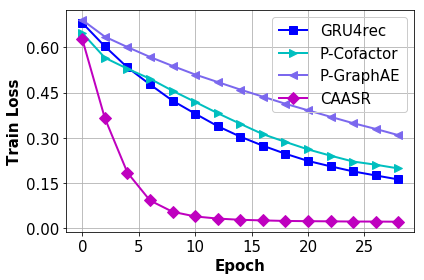

In [15]:
# draw AIV
plot_target_with_epoch(log_dict,'MRR@20',1,subsample=2,linewidth=2,markersize=8,linestyle = linestyles['solid'],y_interval=0.012,x_interval=5)
plot_target_with_epoch(log_dict,'Recall@20',1,subsample=2,linewidth=2,markersize=8,linestyle = linestyles['solid'],y_interval=0.04,x_interval=5)
plot_target_with_epoch(log_dict,'Train Loss',1,subsample=2,linewidth=2,markersize=8,linestyle = linestyles['solid'],y_interval=0.15,x_interval=5)

/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


MRR@20_TaoBao
Recall@20_TaoBao
Train Loss_TaoBao


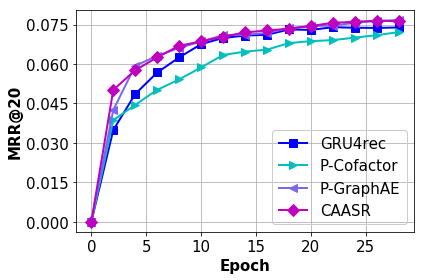

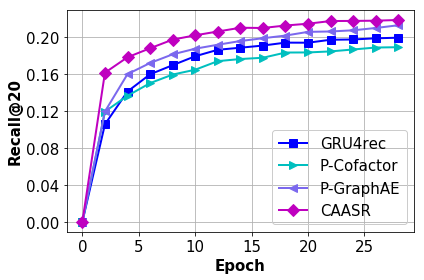

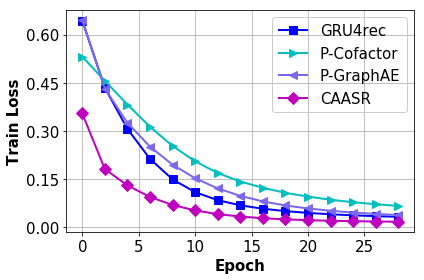

In [16]:
# draw TaoBao
plot_target_with_epoch(log_dict,'MRR@20',2,subsample=2,linewidth=2,markersize=8,linestyle = linestyles['solid'],y_interval=0.015,x_interval=5)
plot_target_with_epoch(log_dict,'Recall@20',2,subsample=2,linewidth=2,markersize=8,linestyle = linestyles['solid'],y_interval=0.04,x_interval=5)
plot_target_with_epoch(log_dict,'Train Loss',2,subsample=2,linewidth=2,markersize=8,linestyle = linestyles['solid'],y_interval=0.15,x_interval=5)

# case III 同一模型不同dropout下不同指标随着epoch的变化情况

In [17]:
subsample=2
linewidth=2
markersize=8
linestyle = linestyles['solid']
x_interval=5

fontsize = 18
legend_size = 9
file_addtional_str = 'dropout_'
image_cate = '.png'

In [18]:
dropout04 = {'MRR@20':[pickle_with_name('GC_gru4rec_test_mrr_dropout_0.4_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_test_mrr_dropout_0.4_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_test_mrr_dropout_0.4_dataset_taobao.pkl')],
          'Recall@20':[pickle_with_name('GC_gru4rec_test_recall_dropout_0.4_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_test_recall_dropout_0.4_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_test_recall_dropout_0.4_dataset_taobao.pkl')],
          'Train Loss': [pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_0.4_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_0.4_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_0.4_dataset_taobao.pkl')]}

In [19]:
dropout06 = {'MRR@20':[pickle_with_name('GC_gru4rec_test_mrr_dropout_0.6_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_test_mrr_dropout_0.6_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_test_mrr_dropout_0.6_dataset_taobao.pkl')],
          'Recall@20':[pickle_with_name('GC_gru4rec_test_recall_dropout_0.6_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_test_recall_dropout_0.6_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_test_recall_dropout_0.6_dataset_taobao.pkl')],
          'Train Loss': [pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_0.6_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_0.6_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_0.6_dataset_taobao.pkl')]}

In [20]:
dropout08 = {'MRR@20':[pickle_with_name('GC_gru4rec_test_mrr_dropout_0.8_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_test_mrr_dropout_0.8_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_test_mrr_dropout_0.8_dataset_taobao.pkl')],
          'Recall@20':[pickle_with_name('GC_gru4rec_test_recall_dropout_0.8_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_test_recall_dropout_0.8_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_test_recall_dropout_0.8_dataset_taobao.pkl')],
          'Train Loss': [pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_0.8_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_0.8_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_0.8_dataset_taobao.pkl')]}

In [21]:
dropout10 = {'MRR@20':[pickle_with_name('GC_gru4rec_test_mrr_dropout_1.0_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_test_mrr_dropout_1.0_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_test_mrr_dropout_1.0_dataset_taobao.pkl')],
          'Recall@20':[pickle_with_name('GC_gru4rec_test_recall_dropout_1.0_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_test_recall_dropout_1.0_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_test_recall_dropout_1.0_dataset_taobao.pkl')],
          'Train Loss': [pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_1.0_dataset_amazon-phone.pkl'),
                  pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_1.0_dataset_amazon-video.pkl'),
                  pickle_with_name('GC_gru4rec_train_bpr_loss_dropout_1.0_dataset_taobao.pkl')]}

In [22]:
log_dict = {
'dropout = 0.6':dropout04,
'dropout = 0.4':dropout06,
'dropout = 0.2':dropout08,
'dropout = 0.0':dropout10,}

/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


MRR@20_ACPA
Recall@20_ACPA
Train Loss_ACPA


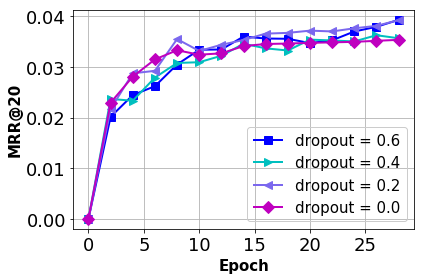

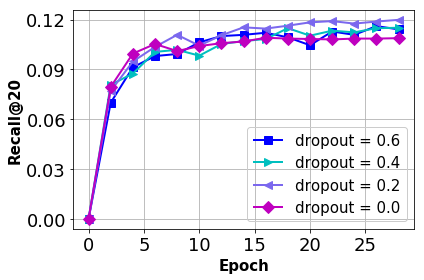

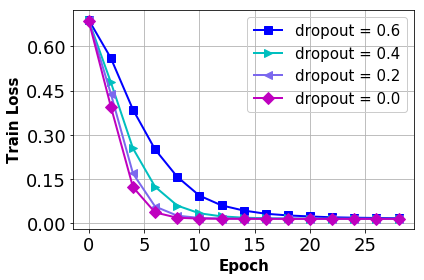

In [23]:
# draw 0 th dataset ACPA
plot_target_with_epoch(log_dict,'MRR@20',0,subsample=subsample,linewidth=linewidth,markersize=markersize,linestyle = linestyle,y_interval=0.01,x_interval=x_interval, file_addtional_str= file_addtional_str, image_cate = image_cate)
plot_target_with_epoch(log_dict,'Recall@20',0,subsample=subsample,linewidth=linewidth,markersize=markersize,linestyle = linestyle,y_interval=0.03,x_interval=x_interval, file_addtional_str = file_addtional_str, image_cate = image_cate)
plot_target_with_epoch(log_dict,'Train Loss',0,subsample=subsample,linewidth=linewidth,markersize=markersize,linestyle = linestyle,y_interval=0.15,x_interval=x_interval, file_addtional_str = file_addtional_str, image_cate= image_cate)

/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


MRR@20_AIV
Recall@20_AIV
Train Loss_AIV


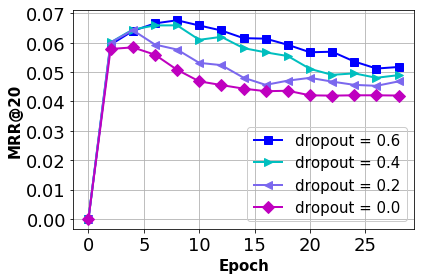

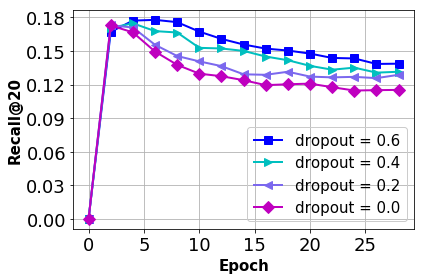

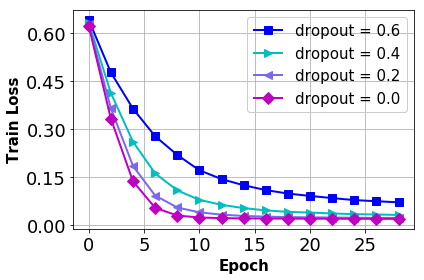

In [24]:
# draw 1 th dataset aiv
plot_target_with_epoch(log_dict,'MRR@20',1,subsample=subsample,linewidth=linewidth,markersize=markersize,linestyle = linestyle,y_interval=0.01,x_interval=x_interval, file_addtional_str= file_addtional_str, image_cate = image_cate)
plot_target_with_epoch(log_dict,'Recall@20',1,subsample=subsample,linewidth=linewidth,markersize=markersize,linestyle = linestyle,y_interval=0.03,x_interval=x_interval, file_addtional_str = file_addtional_str, image_cate = image_cate)
plot_target_with_epoch(log_dict,'Train Loss',1,subsample=subsample,linewidth=linewidth,markersize=markersize,linestyle = linestyle,y_interval=0.15,x_interval=x_interval, file_addtional_str = file_addtional_str, image_cate= image_cate)

/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


MRR@20_TaoBao
Recall@20_TaoBao
Train Loss_TaoBao


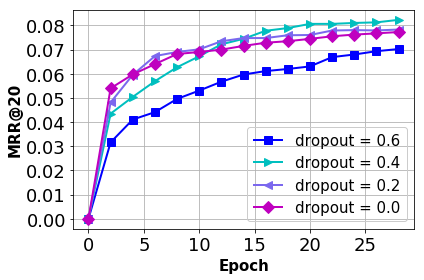

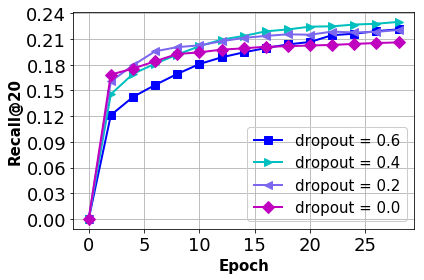

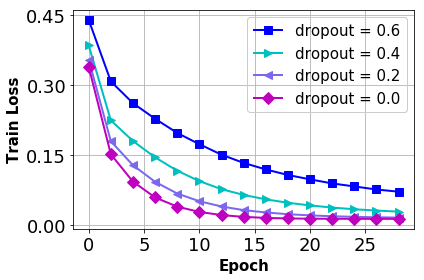

In [25]:
# draw 2 th dataset aiv
plot_target_with_epoch(log_dict,'MRR@20',2,subsample=subsample,linewidth=linewidth,markersize=markersize,linestyle = linestyle,y_interval=0.01,x_interval=x_interval, file_addtional_str= file_addtional_str, image_cate = image_cate)
plot_target_with_epoch(log_dict,'Recall@20',2,subsample=subsample,linewidth=linewidth,markersize=markersize,linestyle = linestyle,y_interval=0.03,x_interval=x_interval, file_addtional_str = file_addtional_str, image_cate = image_cate)
plot_target_with_epoch(log_dict,'Train Loss',2,subsample=subsample,linewidth=linewidth,markersize=markersize,linestyle = linestyle,y_interval=0.15,x_interval=x_interval, file_addtional_str = file_addtional_str, image_cate= image_cate)

# Case IV 隐空间维度变化实验

![avatar](https://matplotlib.org/_images/sphx_glr_named_colors_001.png)
![avatar](https://matplotlib.org/_images/sphx_glr_named_colors_002.png)


In [26]:
def plot_latent_dimension(data_dict,data_name,indicactor):
    ind = np.arange(len(list(data_dict.items())[0][1]))  # the x locations for the groups
    width = 0.15  # the width of the bars
    offset = np.array([-5,-3,-1,1,3,5])/2
    fig, ax = plt.subplots()

    for label,color,i in zip(model_name,color_list,offset):
        ax.bar(ind + width*i, data_dict[label], width,
                    color=color, label=label)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(indicactor,fontdict=font)
    ax.set_xlabel('Latent Dimension',fontdict=font)
    # ax.set_title('Scores by group and gender')
    ax.set_xticks(ind)
    ax.set_xticklabels(('50', '100', '150', '200', '250','300'))

    legend = ax.legend(fontsize='small',loc='best')
    frame = legend.get_frame()
    frame.set_alpha(1)
    frame.set_facecolor('none')
    ax.grid()
    plt.tight_layout()
    plt.yticks(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.tight_layout()
    file_name = '{}_{}'.format(data_name,indicactor)
    print(file_name)
    plt.savefig('histogram_{}.eps'.format(file_name))

In [27]:
model_name = ['BPR','BPR+KNN','GRU4Rec','P-Cofactor','P-GraphAE','CAASR']
color_list = ['blue','g','tab:pink','c','tab:purple','r']
data_name = ('ACPA', 'AIV','TaoBao')

/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


AIV_Recall@20
AIV_MRR@20


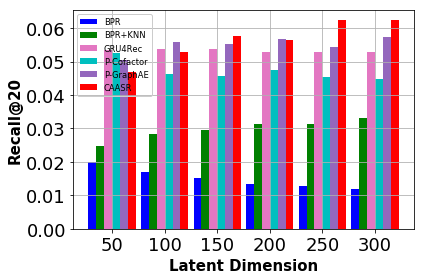

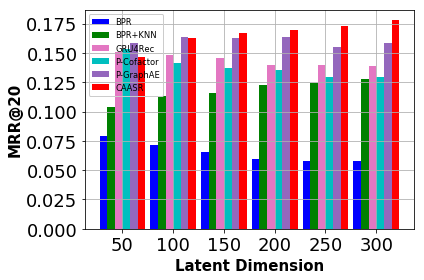

In [28]:
BPR = [0.020077,0.017104,0.015056,0.0134,0.012919,0.011931]
BPR_KNN = [0.024718,0.028276,0.029489,0.031284,0.031488,0.033106]
GRU4Rec = [0.053616,0.053671,0.053914,0.052804,0.052746,0.052934]
Cofactor = [0.052563,0.04632,0.04566,0.047352,0.045352,0.044715]
GraphAE = [0.050543,0.055881,0.055233,0.056815,0.054499,0.05737]
CAASR = [0.047014,0.052913,0.057642,0.05634,0.062305,0.062346]

data_dict = {'BPR':BPR,'BPR+KNN':BPR_KNN,'GRU4Rec':GRU4Rec,'P-Cofactor':Cofactor,'P-GraphAE':GraphAE,'CAASR':CAASR}

plot_latent_dimension(data_dict,'AIV','Recall@20')

BPR = [0.079392,0.071167,0.06557,0.059972,0.05803,0.057459]
BPR_KNN = [0.10418,0.113433,0.115604,0.122801,0.124057,0.128055]
GRU4Rec = [0.150559,0.148503,0.145647,0.139821,0.139479,0.139022]
Cofactor = [0.153415,0.141421,0.137537,0.13548,0.129198,0.12954]
GraphAE = [0.15867,0.163239,0.16244,0.163582,0.155243,0.158099]
CAASR = [0.14679,0.162668,0.167352,0.169979,0.172835,0.177861]

data_dict = {'BPR':BPR,'BPR+KNN':BPR_KNN,'GRU4Rec':GRU4Rec,'P-Cofactor':Cofactor,'P-GraphAE':GraphAE,'CAASR':CAASR}

plot_latent_dimension(data_dict,'AIV','MRR@20')


/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


ACPA_Recall@20
ACPA_MRR@20


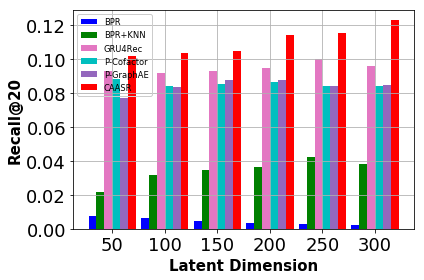

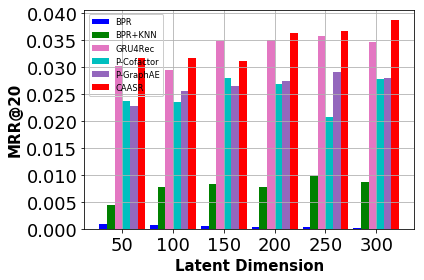

In [29]:
BPR = [0.007268,0.006265,0.004761,0.003258,0.003007,0.002225]
BPR_KNN = [0.021553,0.031829,0.034837,0.03634,0.042355,0.038345
]
GRU4Rec = [0.092731,0.091979,0.093233,0.094486,0.099749,0.095739
]
Cofactor = [0.08822,0.083959,0.08521,0.086215,0.083959,0.08421
]
GraphAE = [0.076942,0.083458,0.087719,0.087468,0.08421,0.084711
]
CAASR = [0.101754,0.103759,0.104511,0.114285,0.115538,0.122807
]

data_dict = {'BPR':BPR,'BPR+KNN':BPR_KNN,'GRU4Rec':GRU4Rec,'P-Cofactor':Cofactor,'P-GraphAE':GraphAE,'CAASR':CAASR}

plot_latent_dimension(data_dict,'ACPA','Recall@20')

BPR = [0.000949,0.000764,0.000445,0.000289,0.000271,0.000149
]
BPR_KNN = [0.004498,0.007707,0.008269,0.007732,0.00981,0.008753
]
GRU4Rec = [0.030195,0.029414,0.03487,0.035115,0.035845,0.034724
]
Cofactor = [0.023775,0.02355,0.028097,0.026979,0.020687,0.027744
]
GraphAE = [0.022809,0.025574,0.026475,0.027491,0.029039,0.028054
]
CAASR = [0.031651,0.03166,0.031106,0.03639,0.036685,0.038715
]

data_dict = {'BPR':BPR,'BPR+KNN':BPR_KNN,'GRU4Rec':GRU4Rec,'P-Cofactor':Cofactor,'P-GraphAE':GraphAE,'CAASR':CAASR}

plot_latent_dimension(data_dict,'ACPA','MRR@20')


/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


TaoBao_Recall@20
TaoBao_MRR@20


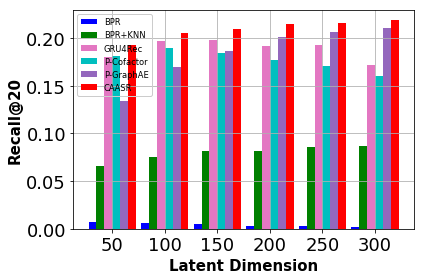

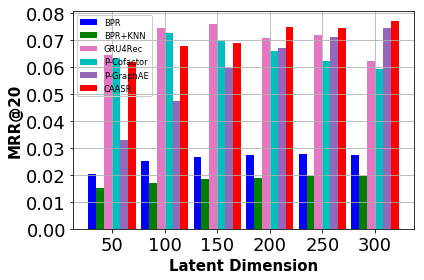

In [30]:
BPR = [0.007268,0.006265,0.004761,0.003258,0.003007,0.002225]
BPR_KNN = [0.066245,0.075762,0.081694,0.081967,0.08548,0.087354
]
GRU4Rec = [0.18007,0.197133,0.198426,0.191688,0.192329,0.171408

]
Cofactor = [0.180907,0.189731,0.184634,0.177049,0.170245,0.160595


]
GraphAE = [0.134425,0.169474,0.186645,0.201154,0.206001,0.210935

]
CAASR = [0.192351,0.205642,0.209087,0.215021,0.216206,0.218651

]

data_dict = {'BPR':BPR,'BPR+KNN':BPR_KNN,'GRU4Rec':GRU4Rec,'P-Cofactor':Cofactor,'P-GraphAE':GraphAE,'CAASR':CAASR}

plot_latent_dimension(data_dict,'TaoBao','Recall@20')

BPR = [0.020373,0.02518,0.026582,0.027289,0.027615,0.027275

]
BPR_KNN = [0.015138,0.016958,0.018602,0.018879,0.01942,0.019784

]
GRU4Rec = [0.064437,0.07437,0.075924,0.07081,0.072075,0.062409

]
Cofactor = [0.063277,0.072787,0.069604,0.066117,0.062304,0.059252

]
GraphAE = [0.03284,0.047552,0.059764,0.067291,0.071108,0.074604]
CAASR = [0.061759,0.067879,0.069016,0.074815,0.074618,0.077153

]

data_dict = {'BPR':BPR,'BPR+KNN':BPR_KNN,'GRU4Rec':GRU4Rec,'P-Cofactor':Cofactor,'P-GraphAE':GraphAE,'CAASR':CAASR}

plot_latent_dimension(data_dict,'TaoBao','MRR@20')


# Case V training ratio变化实验

![avatar](https://matplotlib.org/_images/sphx_glr_named_colors_001.png)
![avatar](https://matplotlib.org/_images/sphx_glr_named_colors_002.png)
![avatar](https://matplotlib.org/_images/sphx_glr_named_colors_003.png)

In [31]:
def plot_train_ratio(data_dict,data_name,indicactor, linewidth = 0.15,fontsize=15, image_cate = '.eps',additional_str='', markersize = 's', linestyle = linestyles['solid']):
    
    ind = np.arange(len(list(data_dict.items())[0][1]))  # the x locations for the groups
    fig, ax = plt.subplots()

    
    for label,color in zip(model_name,color_list):
        ax.plot(data_dict[label],color=color, marker='s', markersize=markersize, linewidth=linewidth,linestyle=linestyle,label=label)

    ax.set_ylabel(indicactor,fontdict=font)
    ax.set_xlabel('x% of train data',fontdict=font)
    # ax.set_title('Scores by group and gender')
    ax.set_xticks(ind)
    ax.set_xticklabels(('20', '40', '60', '80', '100'))

    legend = ax.legend(fontsize=9,loc='best')
    frame = legend.get_frame()
    frame.set_alpha(1)
    frame.set_facecolor('none')
    ax.grid()
    plt.tight_layout()
    plt.yticks(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.tight_layout()
    file_name = '{}_{}'.format(data_name,indicactor)
    print(file_name)
    plt.savefig('{}_{}{}'.format(additional_str,file_name,image_cate))


In [32]:
model_name = ['BPR','BPR+KNN','GRU4Rec','P-Cofactor','P-GraphAE','CAASR (K=3)','CAASR (K=4)','CAASR (K=5)']
color_list = ['blue','g','tab:pink','c','tab:purple','r','orange','m']
data_name = ('ACPA', 'AIV','TaoBao')

In [33]:
# 设置画图参数

additional_str = 'train_ratio'
image_cate= '.png'

linewidth=2
markersize=5
linestyle = linestyles['solid']

fontsize = 18



/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


AIV_Recall@20
AIV_MRR@20


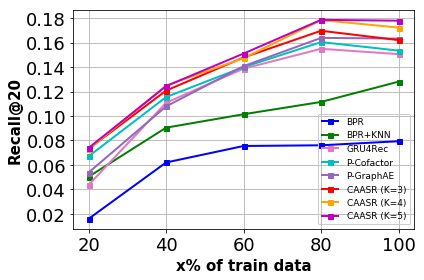

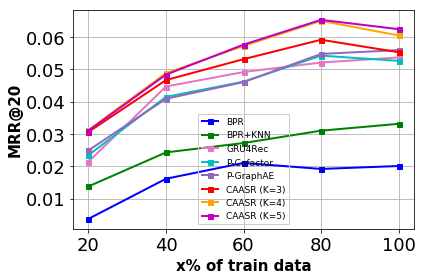

In [34]:
BPR = [0.015992,0.062028,0.075508,0.076079,0.079392]
BPR_KNN = [0.050376,0.090472,0.101439,0.111491,0.128055]
GRU4Rec = [0.043637,0.110806,0.138679,0.1549,0.150559]
Cofactor = [0.067055,0.11549,0.139936,0.160383,0.153415]
GraphAE = [0.053803,0.107836,0.140735,0.16381,0.163239]
CAASR_3 = [0.073109,0.120744,0.147818,0.169636,0.161983]
CAASR_4 = [0.072652,0.124857,0.147246,0.178318,0.172264]
CAASR_5 = [0.073909,0.1244,0.151016,0.178546,0.177861]
data_dict = {'BPR':BPR,'BPR+KNN':BPR_KNN,'GRU4Rec':GRU4Rec,'P-Cofactor':Cofactor,'P-GraphAE':GraphAE,'CAASR (K=3)':CAASR_3, 'CAASR (K=4)':CAASR_4, 'CAASR (K=5)':CAASR_5 }

plot_train_ratio(data_dict,'AIV','Recall@20',fontsize = fontsize, additional_str = additional_str, image_cate=image_cate,linewidth=linewidth,markersize=markersize,linestyle = linestyle)


BPR = [0.003757,0.016139,0.021034,0.019174,0.020077]
BPR_KNN = [0.013781,0.024281,0.027176,0.030996,0.033106]
GRU4Rec = [0.021412,0.044636,0.049102,0.052043,0.053616]
Cofactor = [0.023454,0.041429,0.046114,0.054165,0.052563]
GraphAE = [0.024907,0.040849,0.046008,0.054699,0.055881]
CAASR_3 = [0.030606,0.046625,0.053082,0.059079,0.055224]
CAASR_4 = [0.031174,0.048779,0.057166,0.064921,0.060411]
CAASR_5 = [0.031011,0.048309,0.057562,0.065225,0.062346]
data_dict = {'BPR':BPR,'BPR+KNN':BPR_KNN,'GRU4Rec':GRU4Rec,'P-Cofactor':Cofactor,'P-GraphAE':GraphAE,'CAASR (K=3)':CAASR_3, 'CAASR (K=4)':CAASR_4, 'CAASR (K=5)':CAASR_5 }

plot_train_ratio(data_dict,'AIV','MRR@20',fontsize = fontsize, additional_str = additional_str, image_cate=image_cate,linewidth=linewidth,markersize=markersize,linestyle = linestyle)




/DB/rhome/kncui/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


ACPA_Recall@20
ACPA_MRR@20


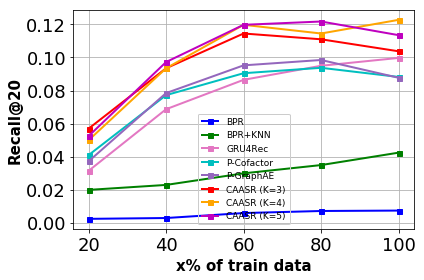

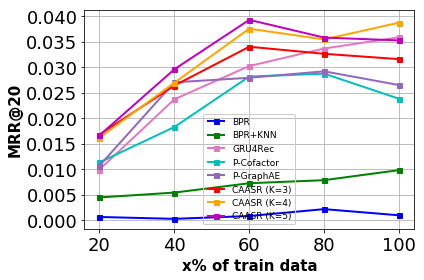

In [35]:
BPR = [0.002255,0.002756,0.005764,0.007017,0.007268]
BPR_KNN = [0.019799,0.022807,0.029824,0.034837,0.042355]
GRU4Rec = [0.031328,0.068671,0.086466,0.094987,0.099749]
Cofactor = [0.040852,0.077192,0.090476,0.093754,0.088215]
GraphAE = [0.037092,0.078446,0.095238,0.098492,0.087719]
CAASR_3 = [0.056892,0.093483,0.114536,0.111027,0.103759]
CAASR_4 = [0.049874,0.093483,0.119799,0.114536,0.122807]
CAASR_5 = [0.05238,0.097243,0.119799,0.121804,0.113533]
data_dict = {'BPR':BPR,'BPR+KNN':BPR_KNN,'GRU4Rec':GRU4Rec,'P-Cofactor':Cofactor,'P-GraphAE':GraphAE,'CAASR (K=3)':CAASR_3, 'CAASR (K=4)':CAASR_4, 'CAASR (K=5)':CAASR_5 }

plot_train_ratio(data_dict,'ACPA','Recall@20',fontsize = fontsize, additional_str = additional_str, image_cate=image_cate,linewidth=linewidth,markersize=markersize,linestyle = linestyle)


BPR = [0.000624,0.000256,0.000814,0.00216,0.000949]
BPR_KNN = [0.00445,0.005406,0.007237,0.007838,0.00981]
GRU4Rec = [0.009912,0.023688,0.030212,0.033644,0.035845]
Cofactor = [0.011314,0.018257,0.028145,0.028715,0.02379]
GraphAE = [0.010673,0.027017,0.027905,0.02917,0.026475]
CAASR_3 = [0.016779,0.026376,0.033989,0.032604,0.031558]
CAASR_4 = [0.016162,0.026932,0.037531,0.03542,0.038715]
CAASR_5 = [0.016604,0.02957,0.039261,0.035785,0.03523]
data_dict = {'BPR':BPR,'BPR+KNN':BPR_KNN,'GRU4Rec':GRU4Rec,'P-Cofactor':Cofactor,'P-GraphAE':GraphAE,'CAASR (K=3)':CAASR_3, 'CAASR (K=4)':CAASR_4, 'CAASR (K=5)':CAASR_5 }

plot_train_ratio(data_dict,'ACPA','MRR@20',fontsize = fontsize, additional_str = additional_str, image_cate=image_cate,linewidth=linewidth,markersize=markersize,linestyle = linestyle)




#### error bar画图

https://pythonforundergradengineers.com/bar-plot-with-error-bars-jupyter-matplotlib.html

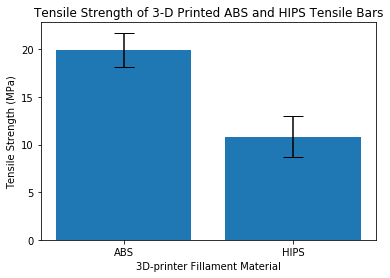

In [189]:
from statistics import mean, stdev
# data
ABS = [18.6, 21.6 ,22, 21, 18, 20.9, 21, 19.3, 18.8, 20, 19.4, 16, 23.8, 19.3, 19.7, 19.5]
HIPS = [10.4, 4.9, 10.2, 10.5, 10.9, 12.9, 11.8, 8.4, 10, 10.6, 8.6, 9.7, 10.8, 10.7, 11, 12.4, 13.3, 11.4, 14.8, 13.5]

# find the mean using the mean() function from the statistics library
ABS_mean = mean(ABS)
HIPS_mean = mean(HIPS)

# find the standard deviation using the stdev() function from the statistics library
ABS_stdev = stdev(ABS)
HIPS_stdev = stdev(HIPS)

yerr=[ABS_stdev, HIPS_stdev]


# build the bar plot
plt.bar(['ABS', 'HIPS'],[ABS_mean, HIPS_mean],yerr=[ABS_stdev, HIPS_stdev], capsize=10)
plt.xlabel('3D-printer Fillament Material')
plt.ylabel('Tensile Strength (MPa)')
plt.title('Tensile Strength of 3-D Printed ABS and HIPS Tensile Bars')
plt.show()

#### error curve画图

<Container object of 3 artists>

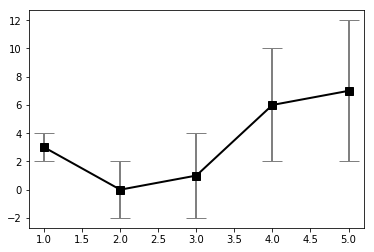

In [35]:
x = np.array(list(range(1,6)))
y = x^2
plt.errorbar(x, y, yerr=x, color = 'black',marker='s',label = 'model_name',markersize = 8, linewidth=2,capsize=10,ecolor='gray') 